In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import italy as main

import importlib
importlib.reload(main)

df = main.load_url()

# Plots size
# In inches (width, height
PLOT_SIZE = (16, 5)
plt.figure(figsize=PLOT_SIZE)
plt.rcParams["figure.figsize"] = PLOT_SIZE

<Figure size 1152x360 with 0 Axes>

# Intervallo di date considerate

In [2]:
main.pd.DataFrame(data = { 'Type':['min', 'max'], 'Value':[min(df.index), max(df.index)] })

Type       Value
0  min  2020-02-24
1  max  2021-12-07

# Grafici complessivi

## Popolazione contagiata
Persone vive con il contagio

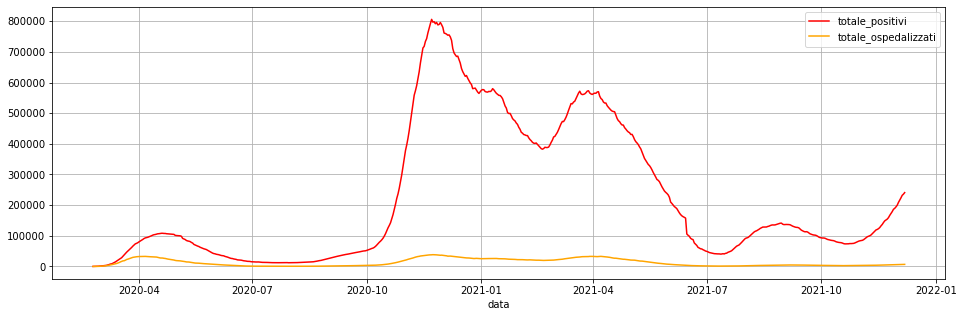

In [3]:
main.simple_plot(df[['totale_positivi', 'totale_ospedalizzati']], colors={'totale_positivi': 'red'})

# Tamponi

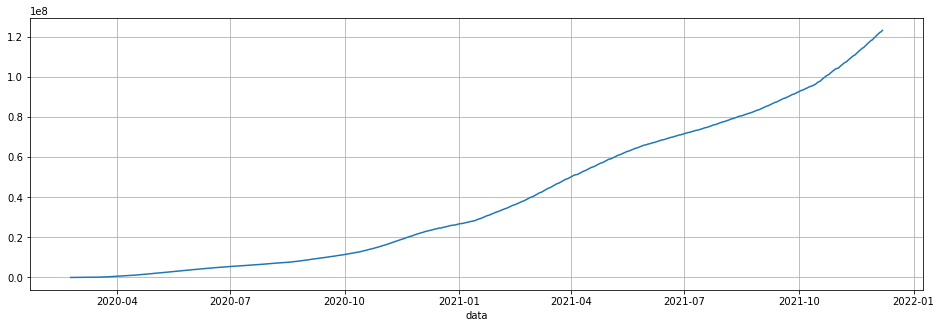

In [4]:
df.totale_tamponi.plot()
main.prepare_plot()

## Rapporto tra tamponi effettuati e positivi individuati

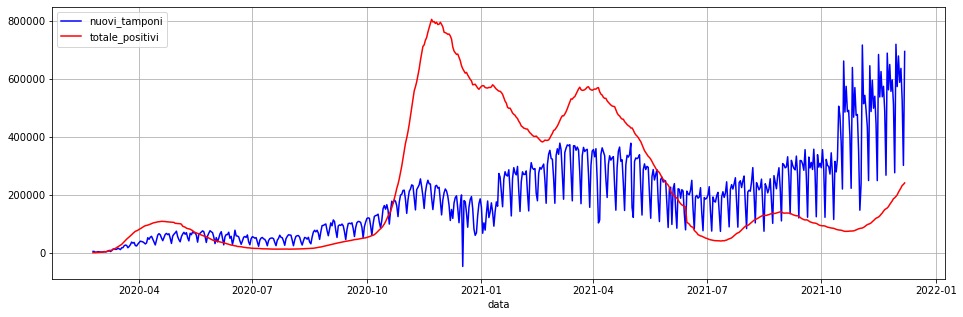

In [5]:
main.simple_plot(df[['nuovi_tamponi','totale_positivi']], colors={'totale_positivi': 'red'})

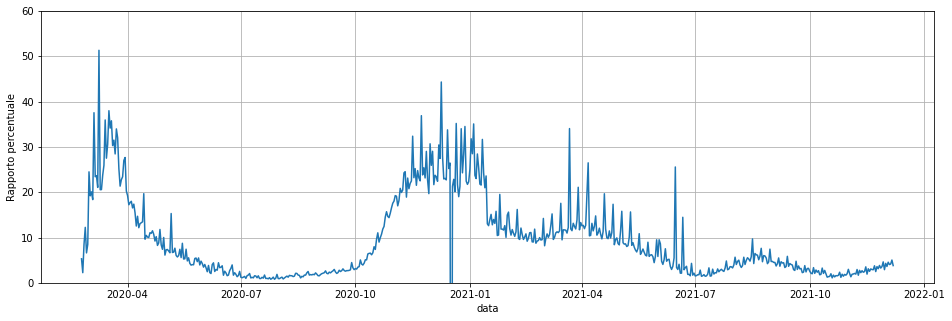

In [6]:
df['stima_contagiati'] = df.nuovi_casi / df.nuovi_tamponi * 100
df.stima_contagiati.plot()
plt.ylabel("Rapporto percentuale")
plt.ylim((0,60))
main.prepare_plot()

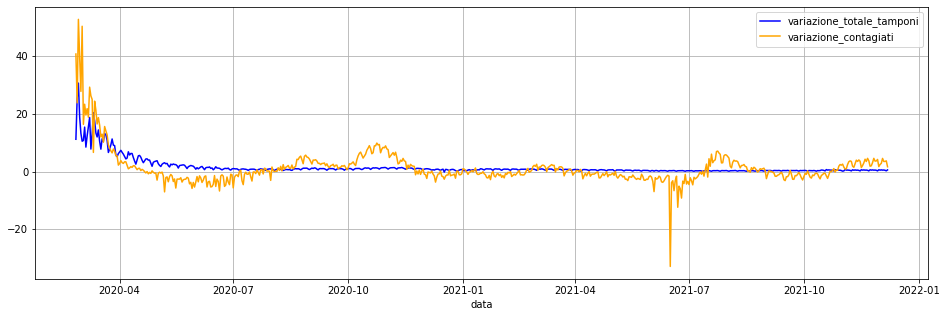

In [7]:
df['variazione_totale_tamponi'] = df.totale_tamponi.pct_change() * 100
df['variazione_contagiati'] = df.totale_positivi.pct_change() * 100
df.variazione_contagiati = df.variazione_contagiati.shift(periods = 1)
temp = df[['variazione_totale_tamponi','variazione_contagiati']]
temp = temp.drop(temp.index[0:2])
main.simple_plot(temp, colors={'variazione_contagiati': 'orange'})

L'andamento dei nuovi contagi individuati è direttamente legato ai tamponi che vengono effettuati. Questo dimostra che è proprio grazie ai tamponi che si riescono ad individuare i nuovi contagi.

# Andamento dei contagi

## Popolazione contagiata
Persone vive con il contagio

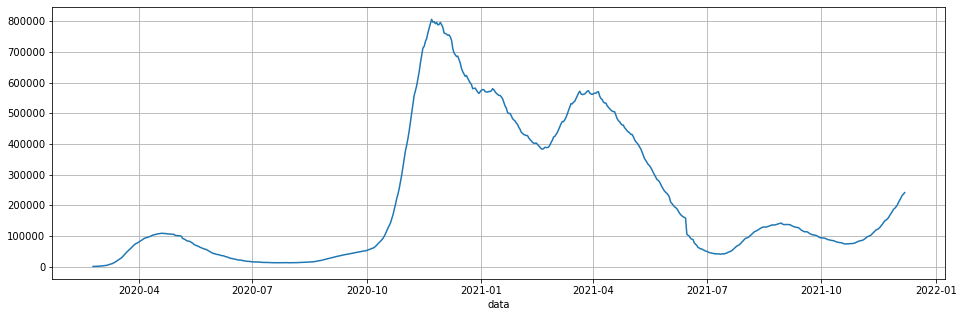

In [8]:
df.totale_positivi.plot()
main.prepare_plot()

## Nuovi contagi
Variazione dei nuovi contagi rispetto al giorno precedente

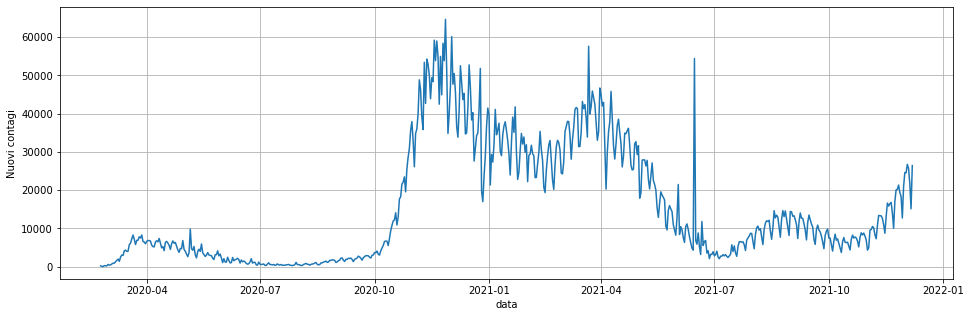

In [9]:
df.nuovi_casi.plot()
plt.ylabel('Nuovi contagi')
main.prepare_plot()

# Sopravvivenza e mortalità a confronto

In [10]:
df['mortalità'] = df.deceduti / df.totale_casi * 100
df['sopravvivenza'] = df.dimessi_guariti / df.totale_casi * 100

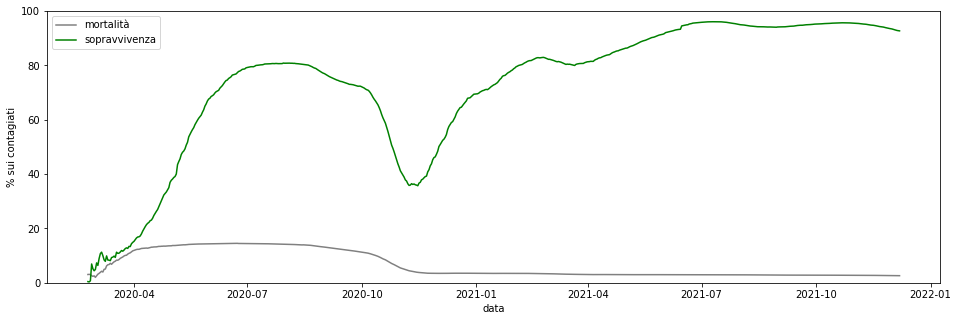

In [11]:
main.simple_plot(df[['mortalità','sopravvivenza']], kind='line')
plt.ylim((0,100))
plt.ylabel("% sui contagiati")
main.prepare_plot()

Text(0, 0.5, '% sui contagiati')

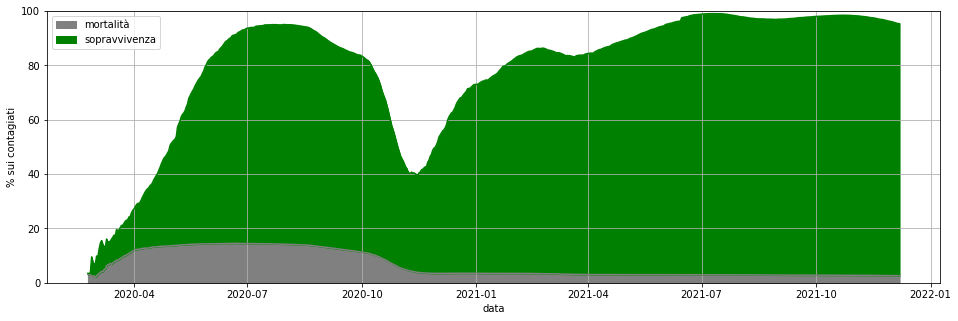

In [12]:
main.simple_plot(df[['mortalità','sopravvivenza']], kind='area')
plt.ylim((0,100))
plt.ylabel("% sui contagiati")

## Andamento di guariti e deceduti negli infetti

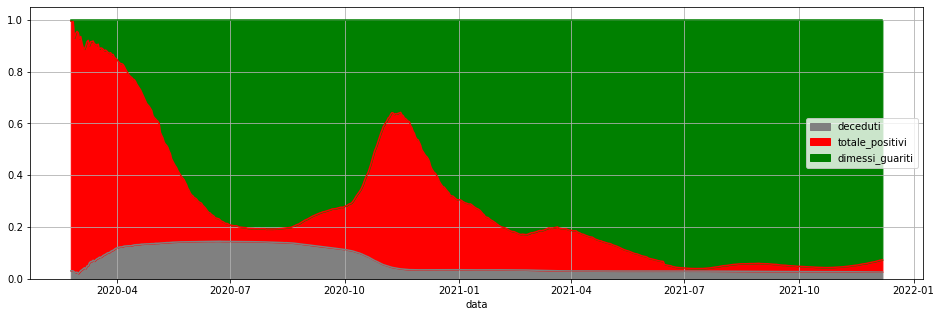

In [13]:
temp = df[['deceduti','totale_positivi','dimessi_guariti']]
#Normalizzo i risulati
temp = temp.div(temp.sum(axis=1), axis=0)
main.simple_plot(temp, colors={'totale_positivi': 'red'}, kind='area')

# Situazione negli ospedali

In [14]:
hospital = df[['ricoverati_con_sintomi', 'terapia_intensiva', 'totale_positivi']];

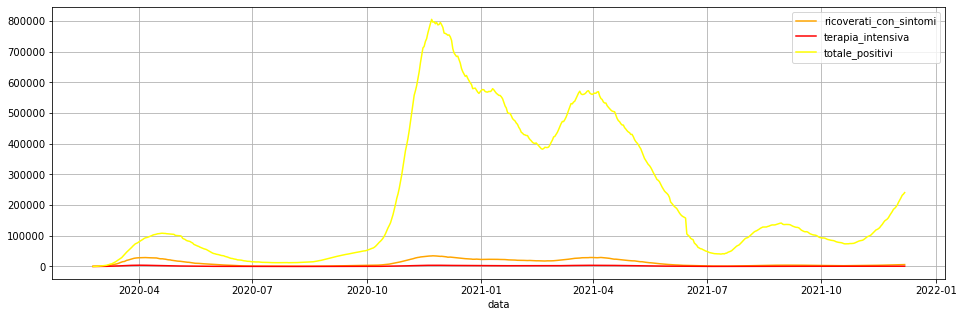

In [15]:
main.simple_plot(hospital, kind='line')

## In terapia intensiva

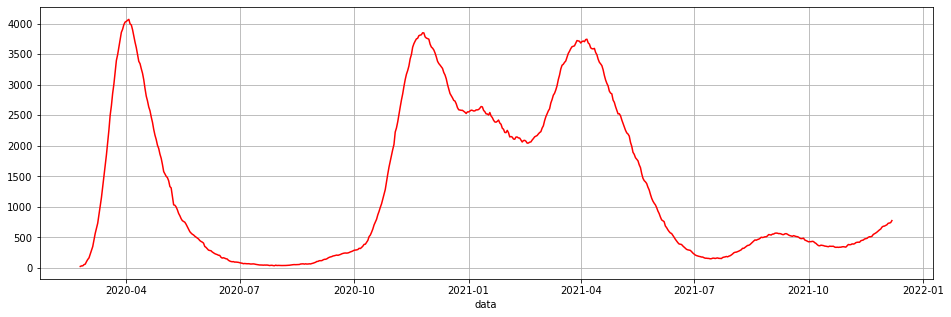

In [16]:
main.simple_plot(hospital['terapia_intensiva'], kind="line")

(0.0, 100.0)

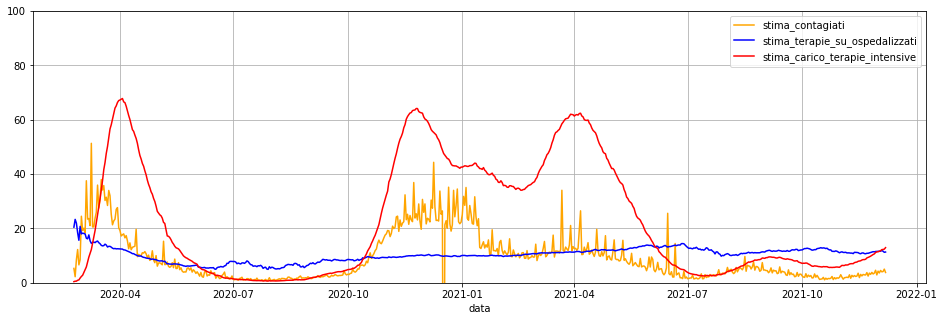

In [17]:
df['stima_terapie_su_ospedalizzati'] = df.terapia_intensiva / df.totale_ospedalizzati * 100
terapie_intensive_italia = 6000
df['stima_carico_terapie_intensive'] = df.terapia_intensiva / terapie_intensive_italia * 100
main.simple_plot(
                 df[['stima_contagiati', 'stima_terapie_su_ospedalizzati', 'stima_carico_terapie_intensive']], 
                 colors = {
                     'stima_contagiati': 'orange',
                     'stima_carico_terapie_intensive': 'red',
                     'stima_terapie_su_ospedalizzati': 'blue'
                 }
                )
plt.ylim((0,100))

## Situazione con l'esterno

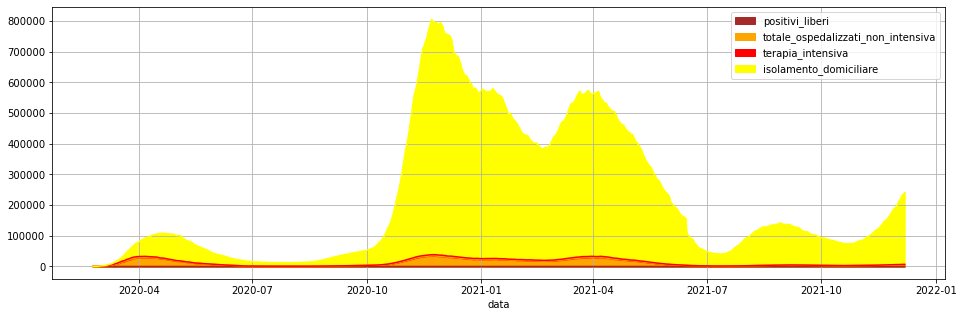

In [18]:
df['positivi_liberi'] = df.totale_positivi - df.totale_ospedalizzati - df.isolamento_domiciliare
df['totale_ospedalizzati_non_intensiva'] = df.totale_ospedalizzati - df.terapia_intensiva
temp = df[['positivi_liberi','totale_ospedalizzati_non_intensiva','terapia_intensiva','isolamento_domiciliare']]
main.simple_plot(temp, colors={'positivi_liberi': 'brown', 'totale_ospedalizzati_non_intensiva': 'orange', 'terapia_intensiva': 'red'}, kind='area')

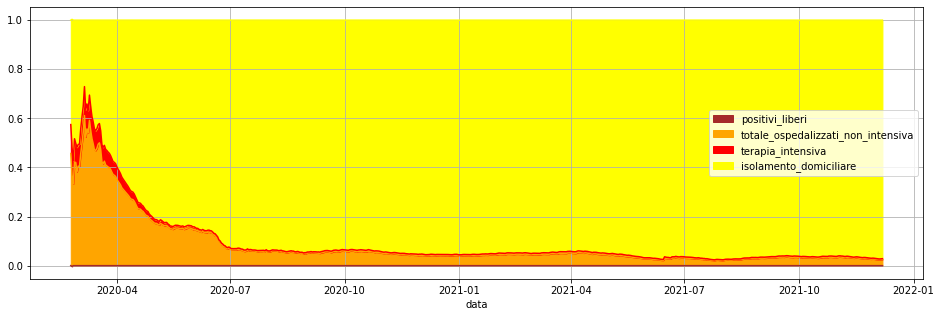

In [19]:
#Normalizzo i risulati
temp_normalized = temp.div(temp.sum(axis=1), axis=0)
main.simple_plot(temp_normalized, colors={'positivi_liberi': 'brown', 'totale_ospedalizzati_non_intensiva': 'orange', 'terapia_intensiva': 'red'}, kind='area')